# 2174802010399-Lăng Nhật Tân

# Khai báo thư viện

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Tạo DataFrame từ dữ liệu

In [94]:
df = pd.DataFrame(
    {
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ivan', 'Jack', 'Kelly', 'Liam', 'Mona', 'Nina', 'Oscar'],
        'Age': [25, 30, 35, 28, 22, 45, 34, 31, 27, 29, 33, 40, 26, 32, 36],
        'Salary': [50000, 60000, 70000, 55000, 52000, 80000, 72000, 68000, 61000, 59000, 63000, 77000, 53000, 66000, 75000]
    }
)

# 2. Hiển thị thông tin DataFrame vừa tạo

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    15 non-null     object
 1   Age     15 non-null     int64 
 2   Salary  15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 492.0+ bytes


# 3. Lọc các hàng trong DataFrame có Age lớn hơn 28

In [96]:
df_age = df[df['Age'] > 28]
df_age

,Name,Age,Salary
1,Bob,30,60000
2,Charlie,35,70000
5,Frank,45,80000
6,Grace,34,72000
7,Hannah,31,68000
9,Jack,29,59000
10,Kelly,33,63000
11,Liam,40,77000
13,Nina,32,66000
14,Oscar,36,75000


# 4. Tính giá trị trung bình cột Salary

In [97]:
df_salary_mean = df['Salary'].mean()
print(f"Gia tri trung binh cua cot salary = {df_salary_mean}")

Gia tri trung binh cua cot salary = 64066.666666666664


# 5. Nhóm dữ liệu theo cột Age và tính tổng Salary cho mỗi nhóm

In [98]:
tmp_df = df.groupby(['Age'])['Salary'].sum()
tmp_df

Age
22    52000
25    50000
26    53000
27    61000
28    55000
29    59000
30    60000
31    68000
32    66000
33    63000
34    72000
35    70000
36    75000
40    77000
45    80000
Name: Salary, dtype: int64

# 6. Sắp xếp DataFrame theo cột Salary giảm dần

In [99]:
df_salary_sort = df['Salary'].sort_values(ascending = False)
df_salary_sort

5     80000
11    77000
14    75000
6     72000
2     70000
7     68000
13    66000
10    63000
8     61000
1     60000
9     59000
3     55000
12    53000
4     52000
0     50000
Name: Salary, dtype: int64

# 7. Vẽ biểu đồ cho cột Age

<Axes: xlabel='Age'>

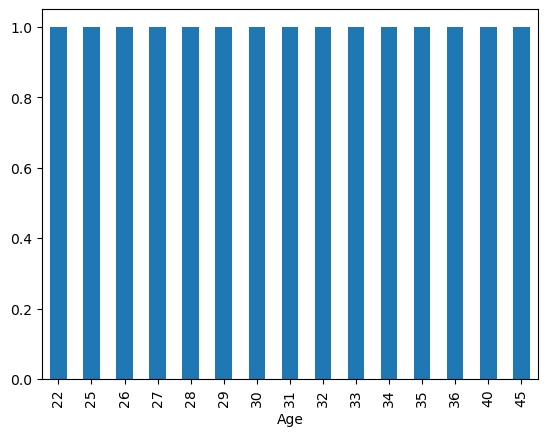

In [100]:
age_bar = df.groupby('Age')['Age'].agg('count')
age_bar.plot.bar()

# 8. Vẽ biểu đồ đường cho cột Salary

<Axes: xlabel='Salary'>

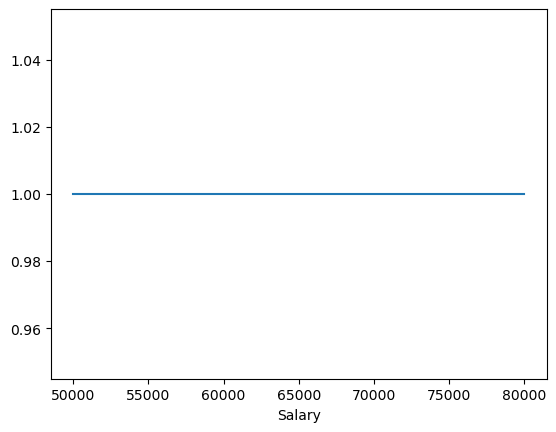

In [101]:
salary_line = df.groupby('Salary')['Salary'].agg('count')
salary_line.plot.line()

# 9. Vẽ biểu đồ tròn cho cột Age

<Axes: ylabel='Age'>

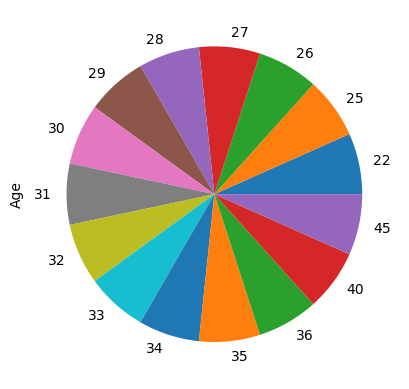

In [102]:
df_pie_age = df.groupby('Age')['Age'].agg('count')
df_pie_age.plot.pie()

# 10. Vẽ biểu đồ phân tán cho Age và Salary

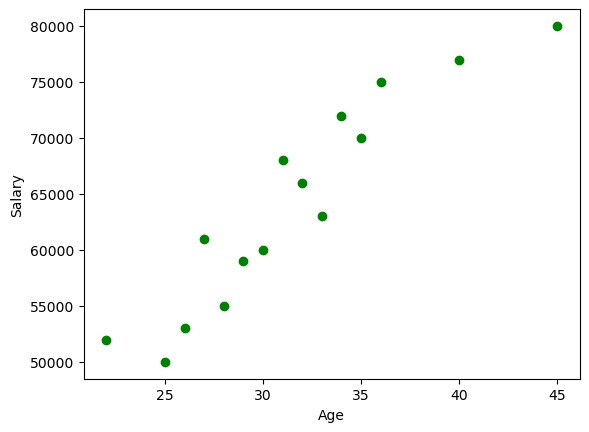

In [103]:
x = df['Age'].values
y = df['Salary'].values
plt.scatter(x, y, color = 'green')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

# 11. Kiểm tra có giá trị NaN nào trong DataFrame không

In [104]:
isNaN = df.isna()
isNaN

,Name,Age,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


# 12. Thay thế các giá trị của cột Age lớn hơn 30 bằng giá trị trung bình của cột đó.

In [105]:
age_col = df['Age'].values
age_mean = int(df['Age'].mean())
new_val = []
for num in age_col:
    if num > 30: new_val.append(age_mean)
    else: new_val.append(num)
df['Age'] = new_val
df

,Name,Age,Salary
0,Alice,25,50000
1,Bob,30,60000
2,Charlie,31,70000
3,David,28,55000
4,Eva,22,52000
5,Frank,31,80000
6,Grace,31,72000
7,Hannah,31,68000
8,Ivan,27,61000
9,Jack,29,59000


# 13. Chuẩn hóa cột Age về khoảng giá trị từ 0 đến 1

In [106]:
def normalize(val, maxi): return val / maxi
col_age = df['Age'].values
maxi = max(col_age)
vector_normal = []
for num in col_age: vector_normal.append([num, normalize(num, maxi)])
new_df = pd.DataFrame(vector_normal, columns = ['Original data', 'Normalize data'])
new_df

,Original data,Normalize data
0,25,0.806452
1,30,0.967742
2,31,1.000000
3,28,0.903226
4,22,0.709677
5,31,1.000000
6,31,1.000000
7,31,1.000000
8,27,0.870968
9,29,0.935484


# 14. Tạo một cột mới Age_group phân loại tuổi thành Young, Middle-aged và Old dựa trên giá trị của cột.

In [107]:
new_col = []
col_age = df['Age'].values
for num in col_age:
    if num < 30: new_col.append('Young')
    elif 30 <= num < 65: new_col.append('Middle-aged')
    else: new_col.append('Old')
df['Age_group'] = new_col
df

,Name,Age,Salary,Age_group
0,Alice,25,50000,Young
1,Bob,30,60000,Middle-aged
2,Charlie,31,70000,Middle-aged
3,David,28,55000,Young
4,Eva,22,52000,Young
5,Frank,31,80000,Middle-aged
6,Grace,31,72000,Middle-aged
7,Hannah,31,68000,Middle-aged
8,Ivan,27,61000,Young
9,Jack,29,59000,Young


# 15. Tính toán tỷ lệ phần trăm thay đổi (percentage change) của cột Salary.

In [108]:
salary_percentage_change = df['Salary'].pct_change()
salary_percentage_change

0          NaN
1     0.200000
2     0.166667
3    -0.214286
4    -0.054545
5     0.538462
6    -0.100000
7    -0.055556
8    -0.102941
9    -0.032787
10    0.067797
11    0.222222
12   -0.311688
13    0.245283
14    0.136364
Name: Salary, dtype: float64

# 16. Tìm các giá trị trùng lặp trong DataFrame dựa trên cột Name và loại bỏ hàng trùng lặp giữ lại hàng đầu tiên.

In [109]:
df.drop_duplicates(subset = ['Name'], keep = 0)
df

,Name,Age,Salary,Age_group
0,Alice,25,50000,Young
1,Bob,30,60000,Middle-aged
2,Charlie,31,70000,Middle-aged
3,David,28,55000,Young
4,Eva,22,52000,Young
5,Frank,31,80000,Middle-aged
6,Grace,31,72000,Middle-aged
7,Hannah,31,68000,Middle-aged
8,Ivan,27,61000,Young
9,Jack,29,59000,Young


# 17. Lưu file

In [110]:
df.to_csv('bai_kiem_tra_so_1.csv')